In [10]:
#Importing The Packeges:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Read the DataSet:-

df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
#Drop unnecessary columns:-

df.drop("User ID",axis=True,inplace=True)

In [24]:
#TO check the shape of the DataSet:-

df.shape

(400, 4)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [26]:
#Check basic statistics for each columns:-

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [27]:
#Finding null values columns:-

df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [59]:
#To convert catogarical column into numeric we use Encoders:-
#Here i m using LabelEncoder.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [60]:
# To check there is imblance in DataSet:-

df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

- There are 257 Person who did not purchased the items and there is 143 person who purchased items.

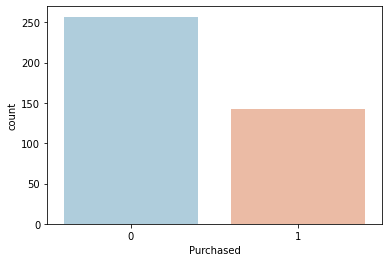

In [61]:
#Visual representation of Purchased columns:-

sns.countplot(x="Purchased",data=df,palette="RdBu_r")
plt.show()

In [62]:
#To count female and male in the dataset:-

df.Gender.value_counts()

0    204
1    196
Name: Gender, dtype: int64

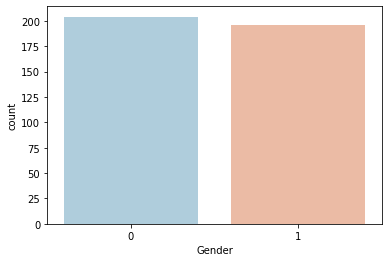

In [63]:
#Visual representation of Gender columns:-

sns.countplot(x="Gender",data=df,palette="RdBu_r")
plt.show()

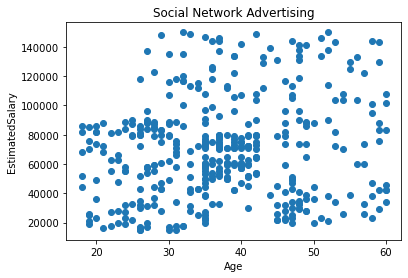

In [64]:
#Visual representation of Age and EstimatedSalary:-

plt.scatter(x="Age",y="EstimatedSalary",data=df)
plt.title("Social Network Advertising")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.show()

<AxesSubplot:>

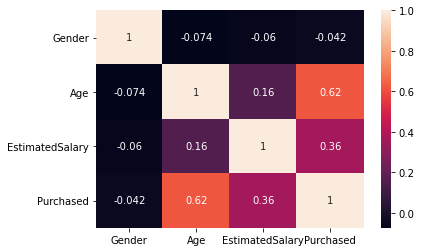

In [65]:
# To find the correlation between coulmns:-

sns.heatmap(df.corr(),annot=True)

- After analysing the heatmap, We will see there is a Very high correlation between Age and Purchased columns.

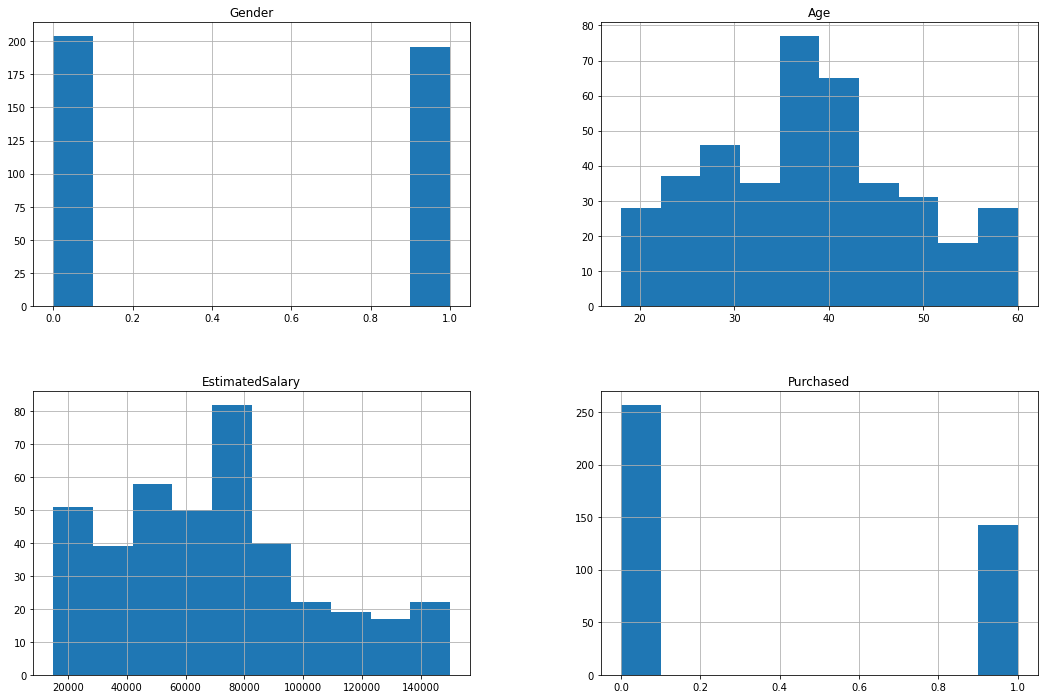

In [66]:
# To check distribution of data and identify outliers:-

df.hist(figsize=(18,12))
plt.show()

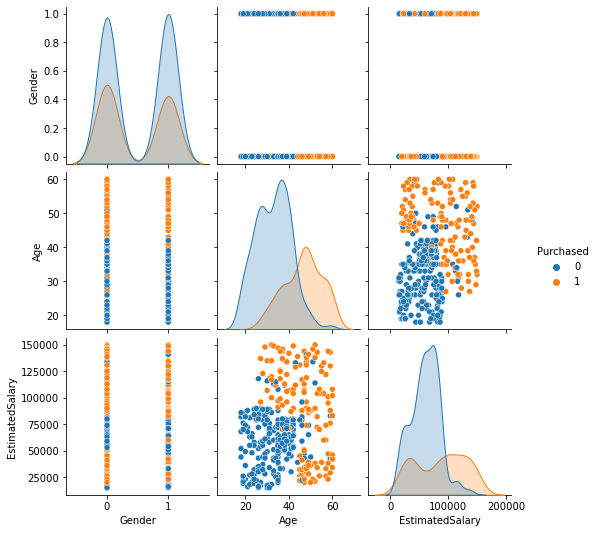

In [67]:
sns.pairplot(df,hue='Purchased')
plt.show()

- After analysing the pairplot below 75000 salaried person or below the age of 40 did not purchased this items. 

# Separation of X and Y.

In [68]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

- Once you have X And Y you will do train test split.

In [69]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

- Importing all the necessary models:-

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.svm import SVC
svc = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

- Here i am using all the models to check the Accuracy and find which model provide us best accuracy for this kind of DataSet.

-  Importing Evaluation Metrics:-

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [72]:
# Defining a Function:-

def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(f"Accuracy :- {accuracy_score(ytest,ypred)}")
    print(classification_report(ytest,ypred))
    print(confusion_matrix(ytest,ypred))
    return model

In [73]:
mymodel(logreg)

Accuracy :- 0.56
              precision    recall  f1-score   support

           0       0.57      0.97      0.72        58
           1       0.00      0.00      0.00        42

    accuracy                           0.56       100
   macro avg       0.29      0.48      0.36       100
weighted avg       0.33      0.56      0.42       100

[[56  2]
 [42  0]]


LogisticRegression()

In [74]:
mymodel(knn)

Accuracy :- 0.74
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        58
           1       0.75      0.57      0.65        42

    accuracy                           0.74       100
   macro avg       0.74      0.72      0.72       100
weighted avg       0.74      0.74      0.73       100

[[50  8]
 [18 24]]


KNeighborsClassifier()

In [75]:
mymodel(svc)

Accuracy :- 0.67
              precision    recall  f1-score   support

           0       0.66      0.90      0.76        58
           1       0.71      0.36      0.48        42

    accuracy                           0.67       100
   macro avg       0.69      0.63      0.62       100
weighted avg       0.68      0.67      0.64       100

[[52  6]
 [27 15]]


SVC()

In [76]:
mymodel(dtc)

Accuracy :- 0.82
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        58
           1       0.77      0.81      0.79        42

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100

[[48 10]
 [ 8 34]]


DecisionTreeClassifier()

In [77]:
mymodel(rfc)

Accuracy :- 0.87
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        58
           1       0.82      0.88      0.85        42

    accuracy                           0.87       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.87      0.87      0.87       100

[[50  8]
 [ 5 37]]


RandomForestClassifier()

- After analysing all the default models, We wiil tell that the best model for Social Network Ads DataSet is Random Forest Classifier And Decision Tree Classifier, Because they give us best accuracy among all the default models. 

. BEST SCORES 
-  RANDOM FOREST CLASSIFIER HAVE 87% OF ACCURACY.
-  DECISION TREE CLASSIFIER HAVE 82% OF ACCURACY.
-  K-NEAREST NEIGHBORS HAVE 74% OF ACCURACY.
-  SUPPORT VECTOR CLASSIFIER HAVE 67% OF ACCURACY.
-  LOGISTIC REGRESSION HAVE 56% OF ACCURACY.